## 0

Text(0, 0.5, 'SEK/month')

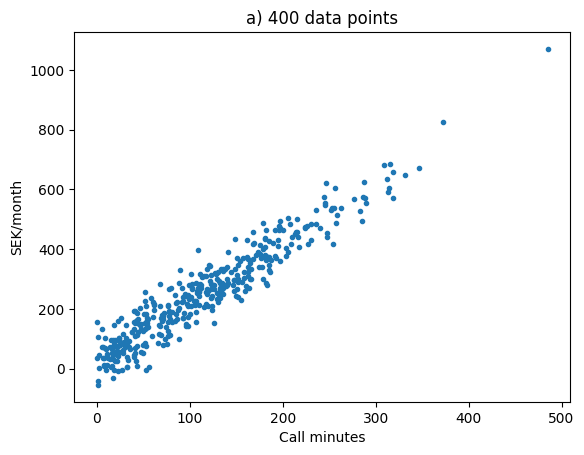

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.random.seed(42)
X = abs(np.random.normal(100, 100, 400))
epsilon = np.random.normal(0, 50, 400)

y = 2*X + 25 + epsilon

plt.plot(X,y, ".")
plt.title("a) 400 data points")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")

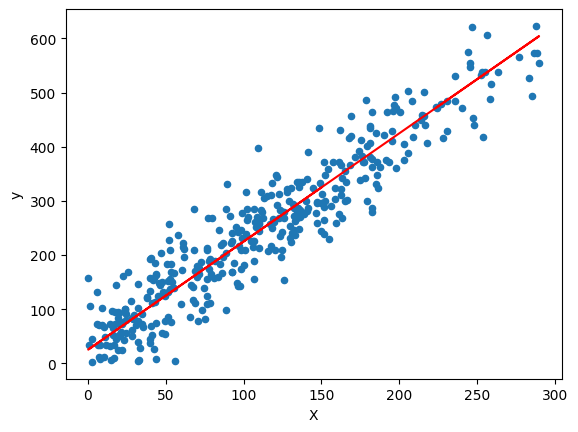

In [282]:
df = pd.DataFrame({"X": X, "y":y})
df = df[df["X"] < 300]
df = df[df["y"] >= 0]
X,y  = df["X"], df["y"]

df.plot.scatter(x = "X", y = "y")

y_line = lambda X: 25 + 2*X
plt.plot(df["X"], y_line(df["X"]), color = "red")

## 1

In [320]:
def train_test_split(X, y, train_fraction=.7, random_state = 42, replace = False):

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    X.insert(0, "Intercept", 1)

    train_size = int(len(X) * train_fraction)
    X_train = X.sample(n = train_size, random_state=random_state, replace=replace)
    y_train = y.sample(n = train_size, random_state=42, replace=replace)
    X_test = X.drop(X_train.index)
    y_test = y.drop(y_train.index)

    return tuple([X_train, X_test, y_train, y_test])

X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 2), (115, 2), (266, 1), (115, 1))

In [321]:
X_train.index, y_train.index
X_test.index, y_test.index

(Int64Index([  1,   4,   8,  13,  14,  20,  21,  27,  32,  34,
             ...
             362, 363, 364, 377, 384, 390, 393, 397, 398, 399],
            dtype='int64', length=115),
 Int64Index([  1,   4,   8,  13,  14,  20,  21,  27,  32,  34,
             ...
             362, 363, 364, 377, 384, 390, 393, 397, 398, 399],
            dtype='int64', length=115))

## Linear regression using normal equation

In [325]:
print(X_train.T.shape, X_train.shape, np.linalg.inv(X_train.T@X_train).shape, X_train.T.shape, y_train.shape)
thetas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

(2, 266) (266, 2) (2, 2) (2, 266) (266, 1)


,Intercept,X
277,1,39.978312
196,1,11.614256
46,1,53.936123
55,1,193.128012
57,1,69.078762
...,...,...
41,1,117.136828
306,1,227.766490
211,1,213.556564
264,1,74.743185


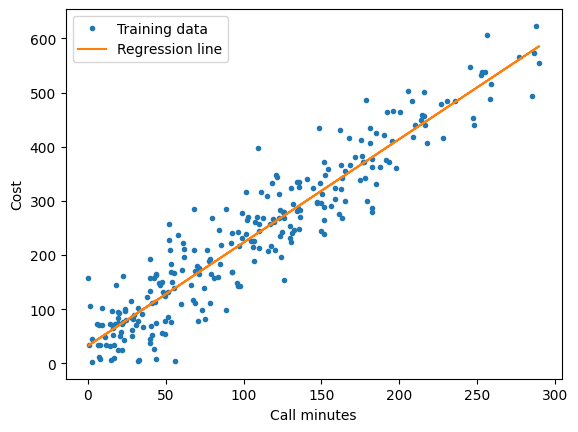

In [326]:
fig, ax = plt.figure(), plt.axes()

ax.plot(X_train["X"], y_train, '.', label = "Training data")
ax.plot(X_train["X"], np.dot(X_train,thetas), label = "Regression line")
ax.set(xlabel = "Call minutes", ylabel = "Cost")
ax.legend()

In [346]:
predict = lambda X, beta: np.dot(X, beta)
m = len(X_test)

mae = 1/m * np.sum(np.abs(predict(X_test, thetas) - y_test))
mse = 1/m * np.sum((predict(X_test, thetas) - y_test)**2)
rmse = np.sqrt(mse)

mae, mse, rmse

(y    40.120027
 dtype: float64,
 y    2401.577129
 dtype: float64,
 y    49.005889
 dtype: float64)

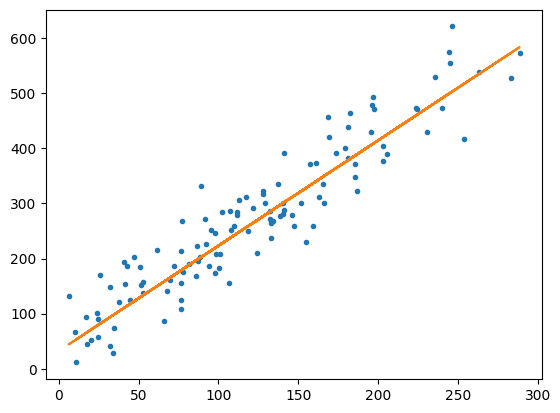

In [355]:
fig, ax = plt.figure(), plt.axes()

ax.plot(X_test["X"], y_test, '.')
ax.plot(X_test["X"], predict(X_test, thetas))

## 4. More explanatory variables

In [395]:
samples = 10000
np.random.seed(42)

x1 = abs(np.random.normal(100, 100, samples))
x2 = np.random.randint(0, 50, samples)
x3 = abs(np.random.normal(0, 2, samples))
epsilon = np.random.normal(0, 50, samples)
y = 25 + 2*x1 + 0.5*x2 + 50*x3 + epsilon

X = pd.DataFrame({"Intercept": 1, "Minutes": x1, "SMS": x2, "Surf": x3, "Cost": y})
X

,Intercept,Minutes,SMS,Surf,Cost
0,1,149.671415,41,2.263011,502.396003
1,1,86.173570,16,0.031570,179.072107
2,1,164.768854,30,0.808925,430.008213
3,1,252.302986,33,2.625826,647.244277
4,1,76.584663,37,3.388079,398.016588
...,...,...,...,...,...
9995,1,230.110206,36,0.611639,473.661741
9996,1,99.834497,18,1.328020,298.342321
9997,1,29.468328,19,2.811456,252.973057
9998,1,149.576557,31,3.439294,536.176482


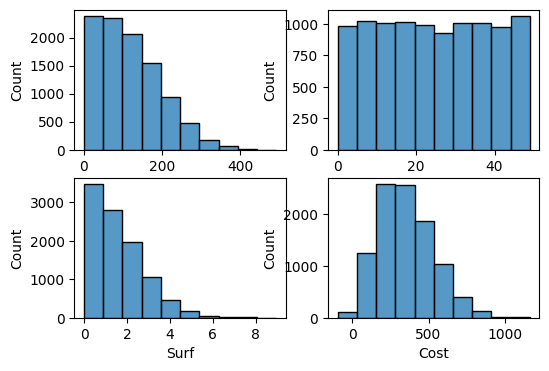

In [438]:
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax = ax.flatten()

for i, feature in enumerate(X.columns[1:]):
    sns.histplot(X[feature], ax = ax[i], bins=10)

In [440]:
X = X[X["Surf"] < 4]
X = X[X["Minutes"] < 300]
X = X[X["Cost"] > 0]

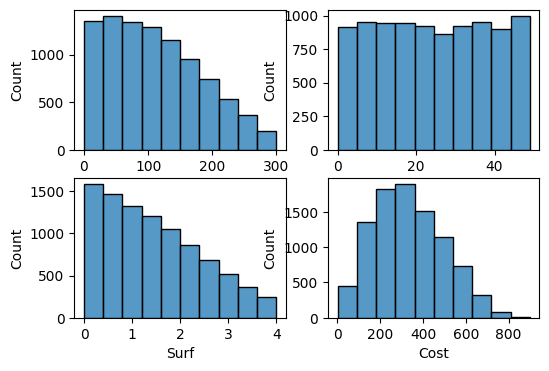

In [442]:
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax = ax.flatten()

for i, feature in enumerate(X.columns[1:]):
    sns.histplot(X[feature], ax = ax[i], bins=10)

## Multiple linear regression

In [463]:
train_size = int(len(X) * 0.8)

X_train = X.sample(n = train_size, random_state=42)
y_train = X_train["Cost"]
X_train = X_train.drop("Cost", axis= "columns")

X_test = X.drop(X_train.index)
y_test = X_test["Cost"]
X_test = X_test.drop("Cost", axis="columns")

In [468]:
thetas = np.linalg.inv(X_train.T@X_train) @ X_train.T @ y_train

thetas

0    26.509517
1     1.995119
2     0.524720
3    48.971645
dtype: float64

In [475]:
y_hat = np.dot(X_test, thetas)
m = len(X_test)

mae = 1/m * np.sum(abs(y_hat - y_test))
mse = 1/m * np.sum((y_hat - y_test)**2)
rmse = np.sqrt(mse)

mae, mse,rmse

(39.23771155971598, 2421.261476516128, 49.20631541292365)